# PROJECT CAPSTONE CEKTANDUR #
# Klasifikasi Penyakit Tanaman denngan metode CNN #
## Anggota : ##
1. (ML) M179B4KY4558 – Yudha Wahyu Saputra – Universitas Ahmad Dahlan - [Active]
2. (ML) M179B4KY0551 – Angger Tirta Tetalen Mukti – Universitas Ahmad Dahlan - [Active]
3. (ML) M492B4KY2014 – Irwandika Malik Fadduani – Universitas Muhammadiyah Yogyakarta - [Active]
4. (CC)  C179B4KY2876 – Muhammad Hanan Rafi Hadi Prayogo – Universitas Ahmad Dahlan - [Active]
5. (CC)  C179B4KY3219 – Naelul Muna Alin Syarif – Universitas Ahmad Dahlan - [Active]
6. (MD) A179B4KY3143 – Mujaddid Fathi Atho'illah – Universitas Ahmad Dahlan - [Active]
7. (MD) A179B4KY3709 – Rayhan Akbar Hidayat – Universitas Ahmad Dahlan - [Active]

# SOURCE DATASET DARI KAGKLE #
## LINK : ##
### https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset ###

### 1. Import Library yang di butuhkan dalam lingkup Proyek ###

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

2024-12-12 00:26:37.411683: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-12 00:26:37.550957: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733937997.630100   15981 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733937997.645627   15981 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-12 00:26:37.829512: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

### 2. Inisialisasi dan Preprosesing Data ###

In [3]:
train_dir = 'ClearDataset/tandur_data/train'
validation_dir = 'ClearDataset/tandur_data/valid'

In [4]:
validation_datagen = ImageDataGenerator(rescale=1.0/255)

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

Found 46358 images belonging to 25 classes.
Found 11588 images belonging to 25 classes.


In [7]:
class_names = list(train_generator.class_indices.keys())
print("Nama-nama kelas:", class_names)


Nama-nama kelas: ['Anggur__Bercak_daun_isariopsis', 'Anggur__Esca(campak_hitam)', 'Anggur__Hitam_busuk', 'Anggur__Sehat', 'Apel__Busuk_hitam', 'Apel__Karat_apel_cedar', 'Apel__Keropeng_apel', 'Apel__Sehat', 'Jagung__Bercak_daun_abu-abu', 'Jagung__Busuk_daun', 'Jagung__Karat_umum', 'Jagung__Sehat', 'Kentang__Busuk_daun_dini', 'Kentang__Busuk_daun_telat', 'Kentang__Sehat', 'Tomat__Bercak_bakteri', 'Tomat__Bercak_daun', 'Tomat__Bercak_target', 'Tomat__Busuk_daun_dini', 'Tomat__Busuk_daun_telat', 'Tomat__Daun_keriting_kuning', 'Tomat__Jamur_septoria_lycopersici', 'Tomat__Sehat', 'Tomat__Tungau_laba-laba_Berbintik', 'Tomat__Virus_mosaik_tomat']


### 3. Membangun Model CNN dengan Conv2D hingga 512 ###

In [8]:
# Membangun model CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Jumlah kelas sesuai dataset
])

/home/wan/anaconda3/envs/tf2/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1733938002.140409   15981 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2159 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


### 4. Model setup early stoping ###
#### set early stoping untuk acuracy dan menunggu 3 epoch jika akurasi tidak meningkat ####

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',  
    patience=3,  # Menunggu 3 epoch jika akurasi tidak meningkat
    mode='max',
    verbose=1,
    restore_best_weights=True
)

### 5. Compile model ###

In [11]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    callbacks=[early_stopping]
)

/home/wan/anaconda3/envs/tf2/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


I0000 00:00:1733938004.068091   16393 service.cc:148] XLA service 0x7fc4c4002660 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733938004.068544   16393 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-12-12 00:26:44.106295: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1733938004.254905   16393 cuda_dnn.cc:529] Loaded cuDNN version 90300


   3/1449 ━━━━━━━━━━━━━━━━━━━━ 1:23 58ms/step - accuracy: 0.0243 - loss: 3.2237.23

I0000 00:00:1733938008.433082   16393 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1449/1449 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.0791 - loss: 3.0785

/home/wan/anaconda3/envs/tf2/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1449/1449 ━━━━━━━━━━━━━━━━━━━━ 157s 105ms/step - accuracy: 0.0791 - loss: 3.0784 - val_accuracy: 0.2683 - val_loss: 2.2982
Epoch 2/50
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 148s 102ms/step - accuracy: 0.2802 - loss: 2.2901 - val_accuracy: 0.5550 - val_loss: 1.3658
Epoch 3/50
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 135s 93ms/step - accuracy: 0.5652 - loss: 1.3539 - val_accuracy: 0.7250 - val_loss: 0.7922
Epoch 4/50
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 129s 89ms/step - accuracy: 0.7089 - loss: 0.9011 - val_accuracy: 0.7669 - val_loss: 0.7370
Epoch 5/50
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 131s 90ms/step - accuracy: 0.7881 - loss: 0.6546 - val_accuracy: 0.8292 - val_loss: 0.5124
Epoch 6/50
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 133s 92ms/step - accuracy: 0.8304 - loss: 0.5359 - val_accuracy: 0.8834 - val_loss: 0.3652
Epoch 7/50
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 148s 97ms/step - accuracy: 0.8634 - loss: 0.4286 - val_accuracy: 0.8723 - val_loss: 0.4102
Epoch 8/50
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 132s 91ms/step - accuracy: 0.8749 - 

### 6. Analisis akurasi dengan plot diagram dan simpan model h5 ###

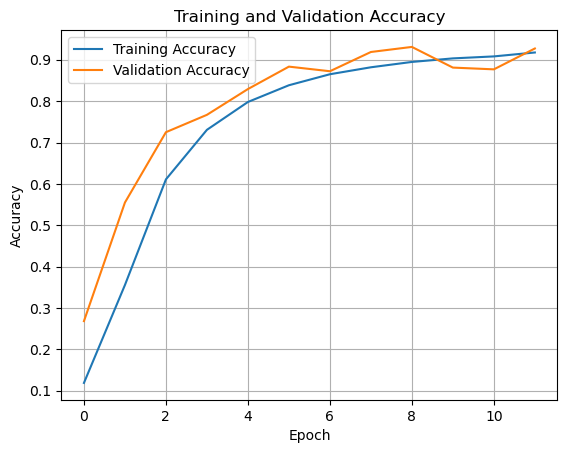

In [12]:
import matplotlib.pyplot as plt

# Plot akurasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid()
plt.show()


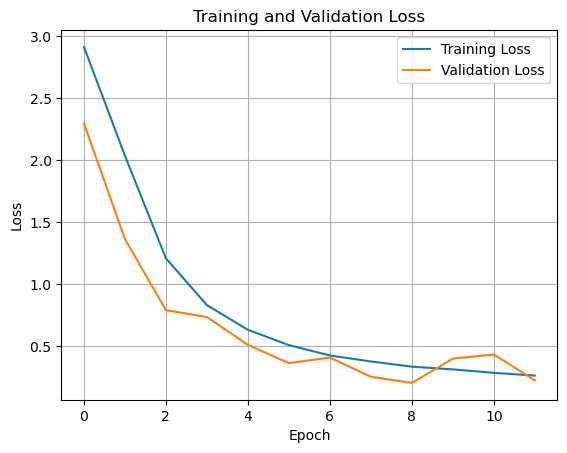

In [13]:
import matplotlib.pyplot as plt

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()

In [15]:
# Simpan model
model.save('Final_CekTandur.h5')

### 7. Uji model H5 dengan data pada direktory test ###

In [20]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf

# Path ke direktori test
test_dir = 'ClearDataset/test'

# Load model
model = tf.keras.models.load_model('Final_CekTandur.h5')

# Mendapatkan label kelas dari model
class_indices = train_generator.class_indices  # Mengambil mapping dari train_generator
class_labels = {v: k for k, v in class_indices.items()}  # Membalik mapping menjadi indeks ke nama kelas

# Menyiapkan gambar untuk prediksi
def preprocess_image(image_path, target_size=(128, 128)):
    img = load_img(image_path, target_size=target_size)  # Load gambar
    img_array = img_to_array(img)  # Konversi ke array
    img_array = np.expand_dims(img_array, axis=0)  # Tambahkan dimensi batch
    img_array = img_array / 255.0  # Rescale
    return img_array

# Melakukan prediksi untuk setiap gambar
for file_name in os.listdir(test_dir):
    file_path = os.path.join(test_dir, file_name)
    if os.path.isfile(file_path):
        # Preprocessing gambar
        img_array = preprocess_image(file_path)

        # Prediksi
        prediction = model.predict(img_array)
        predicted_class = np.argmax(prediction, axis=1)[0]
        predicted_label = class_labels[predicted_class]

        # Tampilkan hasil
        print(f"Gambar: {file_name}")
        print(f"  Prediksi: {predicted_label}")
        print(f"  Probabilitas: {prediction[0][predicted_class]:.2f}")
        print("----")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step    
Gambar: AppleScab2.JPG
  Prediksi: Apel__Keropeng_apel
  Probabilitas: 1.00
----
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Gambar: TomatoEarlyBlight2.JPG
  Prediksi: Tomat__Busuk_daun_dini
  Probabilitas: 0.66
----
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Gambar: TomatoYellowCurlVirus4.JPG
  Prediksi: Tomat__Daun_keriting_kuning
  Probabilitas: 1.00
----
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Gambar: TomatoYellowCurlVirus3.JPG
  Prediksi: Tomat__Daun_keriting_kuning
  Probabilitas: 1.00
----
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Gambar: AppleCedarRust3.JPG
  Prediksi: Apel__Karat_apel_cedar
  Probabilitas: 1.00
----
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Gambar: TomatoEarlyBlight1.JPG
  Prediksi: Tomat__Busuk_daun_telat
  Probabilitas: 0.36
----
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Gambar: AppleScab3.JPG
  Prediksi: Jagung__Bercak_daun_abu-abu
  Probabilitas: 0.80
----
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Gambar: TomatoHealthy2.JPG
  Prediksi: Tomat__Se

### 8. Convert model h5 menjadi tflite ###
#### kenapa tflite ? ####
kami berencana untuk melakukan deploy model cnn ini kedalam aplikasi mobile langsung

In [ ]:
import tensorflow as tf
print(tf.version.VERSION)

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Konversi model ke format .tflite
tflite_model = converter.convert()

# Simpan model TensorFlow Lite ke file
with open('Final_CekTandur.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model berhasil dikonversi ke format TFLite.")


### 9. Convert model h5 menjadi json ###
#### kenapa json ? ####
kami berencana untuk melakukan 

In [ ]:
model = load_model('Final_CekTandur.h5')

In [ ]:
model_json = model.to_json()

with open('Final_CekTandur.json', 'w') as json_file:
    json_file.write(model_json)

print("Model berhasil dikonversi ke JSON dan disimpan sebagai model.json")